<a href="https://colab.research.google.com/github/Baldezo313/Some-real-world-machine-learning-project/blob/main/PROJET_0_ANALYSE_D%E2%80%99UNE_CAMPAGNE_MARKETING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJET 0 : ANALYSE D’UNE CAMPAGNE MARKETING AVEC PANDAS  

## Introduction

Si avoir des compétences techniques telles que la programmation, les statistiques, le nettoyage
de données, le Machine Learning, ..., est absolument incontournable pour un Data Scientist, le
plus grand défi est de comprendre comment ces compétences et concepts se traduisent dans le
monde réel et de pouvoir les appliquer pour résoudre des problèmes en entreprises. L'un des
domaines majeurs où la Data Science peut s'appliquer dans une entreprise est le Marketing. En
effet dans une équipe marketing, un Data Scientist a pour rôle d'aider l'entreprise à comprendre
l'impact de ses campagnes marketing. Il peut donc effectuer plusieurs tâches dont :  
*  L’analyse d’indicateurs clés de performance ;  
*  L’analyse du fonctionnement des différents canaux marketing (Ex : Combien de nouveaux utilisateurs s'abonnent par suite de l'envoi de courriels ; Compte tenu des taux de conversion et des revenus actuels, est-ce que l'entreprise doit continuer à
 investir dans tel ou tel autre canal et combien doit-elle dépenser ? etc.) ;  
*  L’exécution d'expériences (A/B Tests) pour comprendre l'impact d'un changement particulier.

A travers ce projet, vous serez entraîné à traduire les questions commerciales courantes en
résultats mesurables, notamment : "Comment une campagne marketing a-t-elle fonctionné ?",
"Quel canal d'acquisition réfère le plus d'abonnés ?", "Pourquoi un canal particulier est-il sousperformant
?" Nous utiliserons les données marketing d'une entreprise d'abonnement en ligne.

* **Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

* **load datasets**

In [5]:
marketing_df = pd.read_csv('https://raw.githubusercontent.com/Baldezo313/Some-real-world-machine-learning-project/refs/heads/main/Machine-Learning-par-la-pratique-avec-Python-master/marketing.csv?token=GHSAT0AAAAAAC4VKTERYUEWS4MS7CQJQ362Z4FDCAA')

marketing_df.head()

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,1/1/18,House Ads,personalization,True,English,English,0-18 years,1/1/18,NaN,House Ads,True
1,a100000030,1/1/18,House Ads,personalization,True,English,English,19-24 years,1/1/18,NaN,House Ads,True
2,a100000031,1/1/18,House Ads,personalization,True,English,English,24-30 years,1/1/18,NaN,House Ads,True
3,a100000032,1/1/18,House Ads,personalization,True,English,English,30-36 years,1/1/18,NaN,House Ads,True
4,a100000033,1/1/18,House Ads,personalization,True,English,English,36-45 years,1/1/18,NaN,House Ads,True


In [6]:
# Affichage des données
print(marketing_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              10037 non-null  object
 1   date_served          10021 non-null  object
 2   marketing_channel    10022 non-null  object
 3   variant              10037 non-null  object
 4   converted            10022 non-null  object
 5   language_displayed   10037 non-null  object
 6   language_preferred   10037 non-null  object
 7   age_group            10037 non-null  object
 8   date_subscribed      1856 non-null   object
 9   date_canceled        577 non-null    object
 10  subscribing_channel  1856 non-null   object
 11  is_retained          1856 non-null   object
dtypes: object(12)
memory usage: 941.1+ KB
None


Les variables **date_served**, **date_subscribed** et **date_canceled** sont des dates et ne sont pas au
bon format. Nous mettrons ces variables au format 'Datetime'.

In [7]:
# Résumé statistique
marketing_df.describe().T

,count,unique,top,freq
user_id,10037,7309,a100000882,12
date_served,10021,31,1/15/18,789
marketing_channel,10022,5,House Ads,4733
variant,10037,2,control,5091
converted,10022,2,False,8946
language_displayed,10037,4,English,9793
language_preferred,10037,4,English,9275
age_group,10037,7,19-24 years,1682
date_subscribed,1856,31,1/16/18,163
date_canceled,577,115,4/2/18,15


*En utilisant les données, répondons à des questions très importantes pour l’entreprise.*

* **CANAUX MARKETING UTILISES PAR L'ENTREPRISE**

In [8]:
marketing_df['marketing_channel'].value_counts()

,count
marketing_channel,
House Ads,4733
Instagram,1871
Facebook,1860
Push,993
Email,565


Pour avoir plutôt les proportions :

In [9]:
marketing_df['marketing_channel'].value_counts(normalize=True)

,proportion
marketing_channel,
House Ads,0.472261
Instagram,0.186689
Facebook,0.185592
Push,0.099082
Email,0.056376


L'entreprise utilise majoritairement (un peu plus de 47%) les annonces auto-promotionnelle.

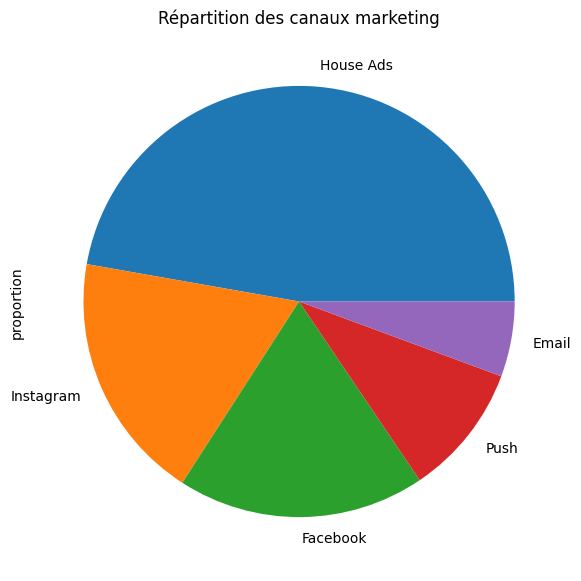

In [10]:
# Canaux marketing

plt.figure(figsize=(10, 7))

marketing_df['marketing_channel'].value_counts(normalize=True).plot(kind='pie')

plt.title('Répartition des canaux marketing')
plt.show()

* **VARIABLES DE DATES AU FORMAT DATETIME**  


In [11]:
# Changement du type de certaines colonnes

for col in ['date_served', 'date_subscribed', 'date_canceled']:
    marketing_df[col] = pd.to_datetime(marketing_df[col])

marketing_df.dtypes

<ipython-input-11-dc779472f3fa>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  marketing_df[col] = pd.to_datetime(marketing_df[col])
<ipython-input-11-dc779472f3fa>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  marketing_df[col] = pd.to_datetime(marketing_df[col])
<ipython-input-11-dc779472f3fa>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  marketing_df[col] = pd.to_datetime(marketing_df[col])


,0
user_id,object
date_served,datetime64[ns]
marketing_channel,object
variant,object
converted,object
language_displayed,object
language_preferred,object
age_group,object
date_subscribed,datetime64[ns]
date_canceled,datetime64[ns]


Comme on peut le voir, Les variables date_served, date_subscribed et date_canceled sont maintenant dans un bon
format (‘datetime’).  



* **Quel est le nombre d’utilisateurs retenus par la campagne marketing ?**

In [12]:
# Nombre d'utilisateurs retenus

marketing_df['is_retained'].sum()

1279

In [13]:
marketing_df['is_retained'].value_counts(normalize=True)

,proportion
is_retained,
True,0.689116
False,0.310884


1279 utilisateurs ont été retenus par la campagne marketing. En proportion, cela équivaut à près de 0,69% de tous les utilisateurs.

* **CREATION DE NOUVELLES COLONNES**  

Lors d'une analyse de données, on peut être amené à créer de nouvelles variables à partir de celles existantes.  

Nous voulons créer une nouvelle variable par encodage des modalités de la variable subscribing_channel :

In [14]:
# Dictionnaire des chaînes distinctes de souscription avec leu rs codes

dict_channels = {'House Ads':1, 'Instagram': 2, 'Facebook': 3, 'Push': 4, 'Email': 5}

# Création de la colonne 'channel_code'
marketing_df['channel_code'] = marketing_df['subscribing_channel'].map(dict_channels)


Ajoutons une nouvelle colonne is_correct_lang qui est égale à 'Yes' si l'utilisateur a vu l'annonce marketing dans sa langue préférée et 'No' dans le cas contraire.

In [15]:
marketing_df['is_correct_lang'] = np.where(marketing_df['language_preferred'] == marketing_df['language_displayed'],
                                           'Yes', 'No')

# Ajout d'une colonne 'DoW' qui représente le jour de la semaine

marketing_df['DoW'] = marketing_df['date_subscribed'].dt.day_of_week

* **UTILISATEURS UNIQUES QUI VOIENT LES ANNONCES MARKETING CHAQUE JOUR**  

Ceci est crucial pour comprendre l'efficacité des efforts marketing au cours du dernier mois.
Pour répondre à cette question, il faut grouper les observations (lignes de la dataframe) par la
variable date_served et compter le nombre d’utilisateurs (variable user_id).

In [16]:
daily_users = marketing_df.groupby('date_served')['user_id'].nunique()

daily_users

,user_id
date_served,
2018-01-01,362
2018-01-02,374
2018-01-03,348
2018-01-04,323
2018-01-05,319
2018-01-06,308
2018-01-07,275
2018-01-08,312
2018-01-09,312


<Axes: xlabel='date_served'>

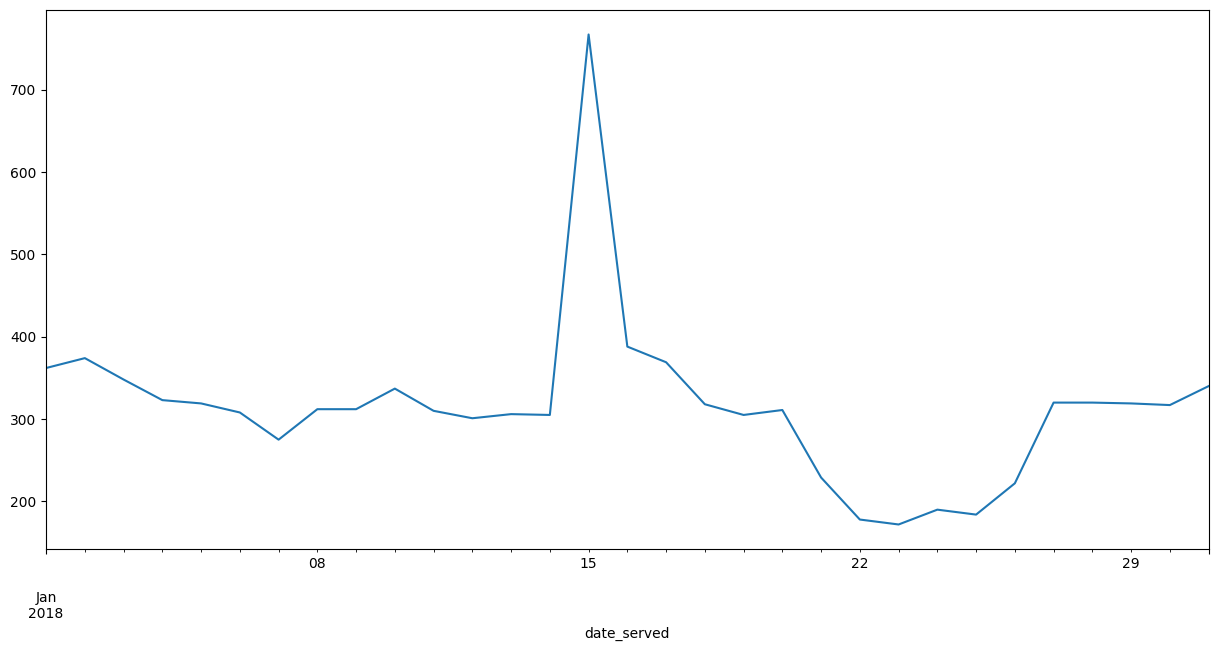

In [17]:
# Visualisation des résultats
plt.figure(figsize=(15, 7))

daily_users.plot.line()



Alors que la première moitié du mois enregistre entre 300 et 400 utilisateurs par jour, il y a eu
un énorme pic au milieu du mois. Cela peut être dû au fait que l'entreprise a déployé une grosse
campagne par mail qui a atteint plusieurs utilisateurs qui n’étaient pas des visiteurs quotidiens
du site.

* ***QUELQUES INDICATEURS CLES DE PERFORMANCE***  
Une campagne marketing a-t-elle réussi ? Il y a plusieurs manières de mesurer le succès d'une
campagne. Le taux de conversion et le taux de rétention sont très souvent utilisés.

- **TAUX DE CONVERSION**  
Parmi toutes les personnes qui sont entrées en contact avec la campagne, combien ont acheté le
produit ou combien se sont abonnés au service de l’entreprise (cela dépend du type de business
et de l'objectif fixé au départ) ? C'est le taux de conversion qui permet de répondre à cette
question. Le taux de conversion est le nombre de personnes converties sur le nombre total de
personnes touchés par la campagne. On peut parler de conversion en termes d'achats ou en
termes d'abonnement à un service par exemple. En termes d'abonnement à un service, le taux
de conversion est le pourcentage des utilisateurs qui ont vu les annonces marketing et se sont
ensuite abonnés.

* **TAUX DE RETENTION**  
Une fois que l'utilisateur s'est abonné, l'est-il toujours après 1 mois, 3 mois ou 1 an ? Le taux
de rétention est le pourcentage de personnes qui restent abonnées après une certaine période de
temps.
Calculons le taux de conversion global.

In [20]:
# Calcul du Taux de conversion global
# Nombre d'utilisateurs uniques

n_unique_users = marketing_df['user_id'].nunique()
print("Le nombre d'utilisateurs uniques est :", n_unique_users)

# Nombre d'utilisateurs uniques ayant souscrit au service
n_souscripteurs = marketing_df[marketing_df['converted'] == True]['user_id'].nunique()
print("Le nombre d'utilisateurs uniques ayant souscrit au service est :", n_souscripteurs)

# Taux de conversion
taux_con_global = n_souscripteurs / n_unique_users
print("Le taux de conversion global est :", round(taux_con_global*100, 2))


Le nombre d'utilisateurs uniques est : 7309
Le nombre d'utilisateurs uniques ayant souscrit au service est : 1015
Le taux de conversion global est : 13.89


Vous vous demandez peut-être, est-ce un bon taux de conversion ? Cela dépendra fortement de
votre entreprise. Il n'y a pas de nombre particulier que toutes les équipes marketing tentent
d'atteindre. Au lieu de cela, lorsque vous travaillez dans une équipe marketing, il est utile
d'examiner les données historiques pour déterminer si un taux de conversion correspond à ce
dont vous pouvez vous attendre.  

Vous calculerez le taux de rétention ou le nombre d'abonnés restants des utilisateurs qui se sont
convertis à votre produit. Cela vous permettra de savoir si votre campagne marketing a converti
des abonnés réellement intéressés par le produit.  

Il est possible de créer une entreprise avec un taux de conversion élevé en offrant aux
utilisateurs un essai gratuit, mais avoir un faible taux de rétention une fois que les utilisateurs
sont facturés pour vos services. Ce n'est pas intrinsèquement une mauvaise chose, mais il est
important de fournir aux parties prenantes (décideurs et actionnaires) de votre entreprise un
aperçu du pourcentage d'utilisateurs qui restent abonnés.  

* **Calculons donc le taux de rétention global !**

In [21]:
# Calcul du taux de rétention global d'un mois
# nombre de personnes qui sont restées abonnées

retained = marketing_df[marketing_df['is_retained'] == True]['user_id'].nunique()

# Taux de rétention
taux_retention_global = retained / n_souscripteurs
print("Le taux de rétention global est :", round(taux_retention_global*100, 2))

Le taux de rétention global est : 66.8


Tout comme avec le taux de conversion, il n'y a pas de taux de rétention standard qui
s'appliquera aux entreprises et aux industries. Regardez les taux de rétention historiques ou les
taux de rétention d'entreprises dans un secteur similaire pour interpréter vos résultats.

**SEGMENTATION DE CLIENTELE**  

Au lieu de calculer par exemple les taux de conversion et de rétention de l'ensemble, on peut
les calculer par groupe d'âge par exemple. Le fait de grouper les clients selon certaines de leurs
caractéristiques similaires est une technique appelée segmentation. Elle permet de faire des
analyses plus approfondies et d'effectuer des campagnes marketing beaucoup plus ciblées.  

* **TAUX DE RETENTION PAR CANAL DE SOUSCRIPTION**

Pour obtenir le taux de rétention pour un canal de souscription, il faudra calculer le nombre
total d’utilisateurs retenus par ce canal divisé par le nombre total d’utilisateurs ayant souscrit à
un abonnement via ce canal.

In [22]:
# Nombre total d'utilisateurs retenus par canal de marketing

n_retained_per_canal = marketing_df[marketing_df['is_retained'] == True].groupby('subscribing_channel')['user_id'].nunique()

print(n_retained_per_canal)

subscribing_channel
Email        141
Facebook     152
House Ads    173
Instagram    158
Push          54
Name: user_id, dtype: int64


Pour chaque canal de souscription, calculons le nombre total d'utilisateurs du site web ayant
souscrit à un abonnement.

In [23]:
# Nombre total d'utilisateurs ayant souscrit à l'abonnement via chaque canal

n_converted_per_canal = marketing_df[marketing_df['converted'] == True].groupby('subscribing_channel')['user_id'].nunique()

print(n_converted_per_canal)

subscribing_channel
Email        161
Facebook     221
House Ads    298
Instagram    232
Push          77
Name: user_id, dtype: int64


Nous pouvons maintenant calculer le taux de rétention pour chacun des canaux de souscription :

In [24]:
# Taux de rétention par canal de souscription

taux_retention_par_canal = (n_retained_per_canal / n_converted_per_canal) * 100
taux_retention_par_canal.sort_values(ascending=False)

,user_id
subscribing_channel,
Email,87.577640
Push,70.129870
Facebook,68.778281
Instagram,68.103448
House Ads,58.053691


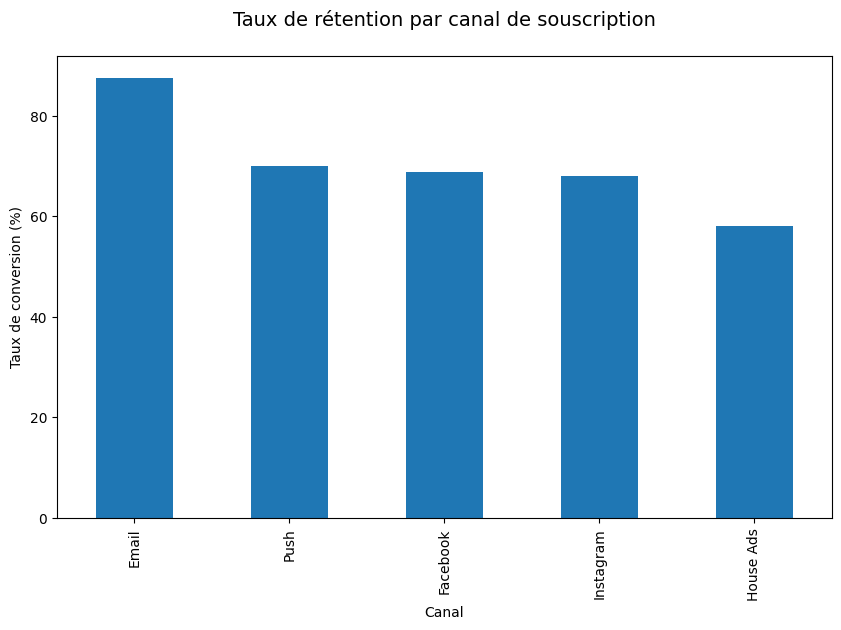

In [25]:
# Visualisation des résultats
plt.figure(figsize=(10, 6))
taux_retention_par_canal.sort_values(ascending=False).plot(kind='bar')
plt.title("Taux de rétention par canal de souscription\n", fontsize=14)
plt.xlabel('Canal')
plt.ylabel('Taux de conversion (%)')
plt.show()

Les courriers électroniques présentent le taux de rétention le plus élevé parmi les canaux de
souscription au service de cette entreprise.

* **AUTOMATISATION DU CALCUL DE TAUX DE RETENTION**  
Puisque nous allons devoir calculer à plusieurs reprises le taux de rétention pour différents
segments, définissons une fonction qui nous permettra d'automatiser ce calcul afin de ne pas
recopier du code.  

In [26]:
# Fonction de calcul du taux de rétention
def retention_rate(dataframe, column_name):
  retained = dataframe[dataframe['is_retained'] == True].groupby(column_name)['user_id'].nunique()
  converted = dataframe[dataframe['converted'] == True].groupby(column_name)['user_id'].nunique()
  retention_rate = retained / converted
  return retention_rate

Nous allons vérifier que la fonction marche très bien en l'appliquant pour recalculer le taux de
rétention par canal de souscription.

In [27]:
# Appel de la fonction retention_rate() pour vérification
retention_rate(marketing_df, ['subscribing_channel'])

,user_id
subscribing_channel,
Email,0.875776
Facebook,0.687783
House Ads,0.580537
Instagram,0.681034
Push,0.701299


La fonction a donné le même résultat que précédemment donc elle marche bien. Appliquons
cette fonction pour calculer le taux de rétention selon la langue d’affichage de l’annonce.

In [28]:
# Taux de rétention par langue affichée
taux_retention_par_langue = retention_rate(marketing_df, ['language_displayed'])
taux_retention_par_langue

,user_id
language_displayed,
Arabic,0.750000
English,0.668467
German,0.773585
Spanish,1.000000


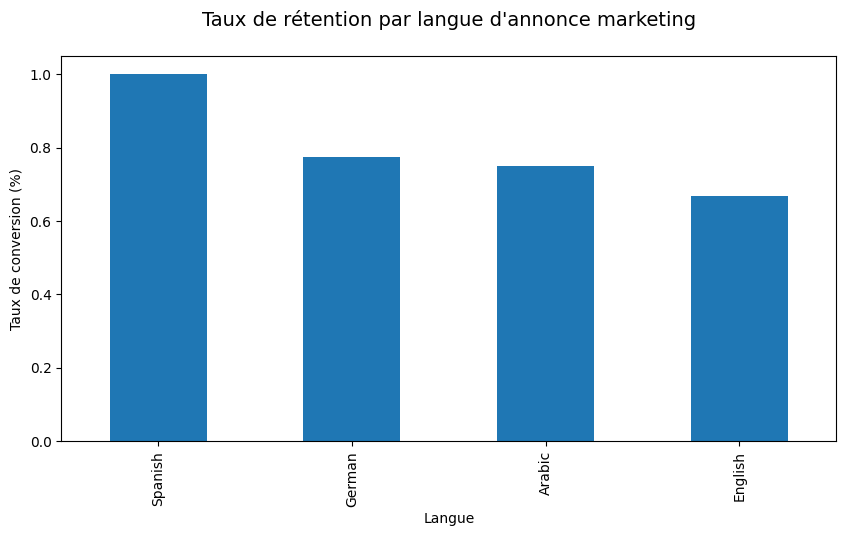

In [29]:
# Visualisation des résultats
plt.figure(figsize=(10, 5))
taux_retention_par_langue.sort_values(ascending=False).plot(kind='bar')
plt.title("Taux de rétention par langue d'annonce marketing\n", fontsize=14)
plt.xlabel('Langue')
plt.ylabel('Taux de conversion (%)')
plt.show()

L'Espagnol offre le meilleur taux de rétention (environ 100%).

* **TAUX DE CONVERSION PAR CANAL D'ACQUISITION**  


In [30]:
# Nombre d'utilisateurs uniques ayant souscrit au service
n_souscripteurs_par_canal = marketing_df[marketing_df['converted']==True].groupby('subscribing_channel')['user_id'].nunique()

# Nombre total de personnes atteintes par la campagne pour chaque canal
total_per_canal = marketing_df.groupby('subscribing_channel')['user_id'].nunique()


taux_conv_par_canal = (n_souscripteurs_par_canal / total_per_canal) * 100
taux_conv_par_canal.sort_values(ascending=False)

,user_id
subscribing_channel,
Facebook,100.000000
House Ads,100.000000
Instagram,100.000000
Push,100.000000
Email,83.854167


* **AUTOMATISATION DU CALCUL DU TAUX DE CONVERSION**  
Puisque nous allons devoir calculer à plusieurs reprises le taux de conversion pour différents
segments, définissons une fonction qui nous permettra d'automatiser ce calcul afin de ne pas
recopier du code.  

In [31]:
# Définition d'une fonction de calcul du taux de conversion
def conversion_rate(dataframe, column_names):
  # Nombre total d'utilisateurs converties
  column_conv = dataframe[dataframe['converted'] == True].groupby(column_names)['user_id'].nunique()
  # Nombre total d'utilisateurs
  column_total = dataframe.groupby(column_names)['user_id'].nunique()
  # Taux de conversion
  conversion_rate = column_conv/column_total

  # Remplacement des valeurs manquantes par 0
  conversion_rate = conversion_rate.fillna(0)
  return conversion_rate

# Vérification de la fonction
conversion_rate(marketing_df, ['subscribing_channel'])

,user_id
subscribing_channel,
Email,0.838542
Facebook,1.000000
House Ads,1.000000
Instagram,1.000000
Push,1.000000


* **TAUX DE CONVERSION PAR LANGUE DE L'ANNONCE**  

On veut calculer le taux de conversion pour chacune des langues d'annonce afin de savoir
laquelle est la plus efficace pour les campagnes.

In [32]:
taux_conv_par_langue = conversion_rate(marketing_df, ['language_displayed'])
print(taux_conv_par_langue)

language_displayed
Arabic     0.500000
English    0.129167
German     0.716216
Spanish    0.200000
Name: user_id, dtype: float64


L'Allemand offre le meilleur taux de conversion (environ 72%) et un taux de rétention de 77%.
Nous avions vu que l'espagnol a le meilleur taux de rétention (100%). Ici, on voit que pour les
annonces, cette langue présente un taux de conversion de 20%.

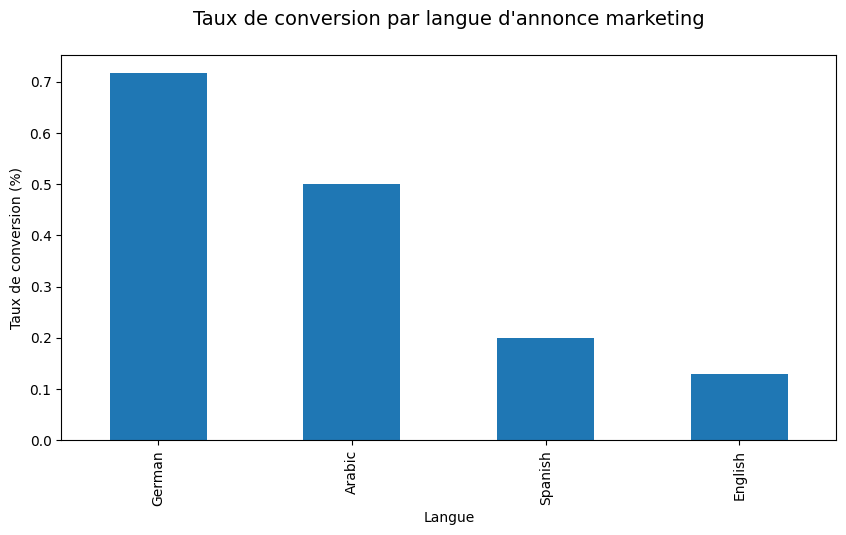

In [33]:
# Visualisation des résultats
plt.figure(figsize=(10, 5))
taux_conv_par_langue.sort_values(ascending=False).plot(kind='bar')
plt.title("Taux de conversion par langue d'annonce marketing\n", fontsize=14)
plt.xlabel('Langue')
plt.ylabel('Taux de conversion (%)')
plt.show()


Les campagnes marketing en Allemand semblent être plus efficaces que celles dans les autres
langues en termes de conversion des utilisateurs.

* **TAUX DE CONVERSION JOURNALIER**



In [34]:
# Calcul du taux de conversion journalier
taux_conv_journalier = conversion_rate(marketing_df, ['date_served'])
print(taux_conv_journalier)

date_served
2018-01-01    0.099448
2018-01-02    0.098930
2018-01-03    0.103448
2018-01-04    0.108359
2018-01-05    0.125392
2018-01-06    0.113636
2018-01-07    0.141818
2018-01-08    0.115385
2018-01-09    0.125000
2018-01-10    0.118694
2018-01-11    0.080645
2018-01-12    0.076412
2018-01-13    0.084967
2018-01-14    0.085246
2018-01-15    0.113429
2018-01-16    0.255155
2018-01-17    0.219512
2018-01-18    0.091195
2018-01-19    0.059016
2018-01-20    0.067524
2018-01-21    0.087336
2018-01-22    0.123596
2018-01-23    0.122093
2018-01-24    0.115789
2018-01-25    0.125000
2018-01-26    0.090090
2018-01-27    0.065625
2018-01-28    0.062500
2018-01-29    0.059561
2018-01-30    0.066246
2018-01-31    0.052941
Name: user_id, dtype: float64


In [35]:
# Transformation du résultat en dataframe
taux_conv_journalier = pd.DataFrame(taux_conv_journalier.reset_index())
taux_conv_journalier.columns = ['date_subscribed', 'conversion_rate']
taux_conv_journalier.head()

,date_subscribed,conversion_rate
0,2018-01-01,0.099448
1,2018-01-02,0.098930
2,2018-01-03,0.103448
3,2018-01-04,0.108359
4,2018-01-05,0.125392


Jusqu’à présent, nous avons calculé des taux de rétention et de reconversion en fonction d’une
seule variable. Sachez qu’il est possible de considérer plus d’une variable.

* **TAUX DE CONVERSION JOURNALIER PAR GROUPE D'AGES**  


In [36]:
daily_conv_rate_age_group = conversion_rate(marketing_df, ['date_served', 'age_group'])
print(daily_conv_rate_age_group)

date_served  age_group  
2018-01-01   0-18 years     0.155172
             19-24 years    0.196721
             24-30 years    0.105263
             30-36 years    0.040816
             36-45 years    0.042553
                              ...   
2018-01-31   24-30 years    0.057692
             30-36 years    0.000000
             36-45 years    0.035088
             45-55 years    0.023256
             55+ years      0.026316
Name: user_id, Length: 217, dtype: float64


Transformons ces données en une dataframe.

In [37]:
daily_conv_rate_age_group = pd.DataFrame(daily_conv_rate_age_group.unstack(level=1))
# level = 1 car c'est la variable age_group (position 1) qu'on veut désemballer
# l'indexation dans python débute par 0
daily_conv_rate_age_group.head()

age_group,0-18 years,19-24 years,24-30 years,30-36 years,36-45 years,45-55 years,55+ years
date_served,,,,,,,
2018-01-01,0.155172,0.196721,0.105263,0.040816,0.042553,0.022222,0.086957
2018-01-02,0.180328,0.164384,0.114754,0.040000,0.043478,0.043478,0.024390
2018-01-03,0.102041,0.208955,0.150943,0.042553,0.060000,0.047619,0.043478
2018-01-04,0.117647,0.200000,0.183673,0.045455,0.043478,0.061224,0.073171
2018-01-05,0.142857,0.250000,0.136364,0.090909,0.068182,0.046512,0.088889


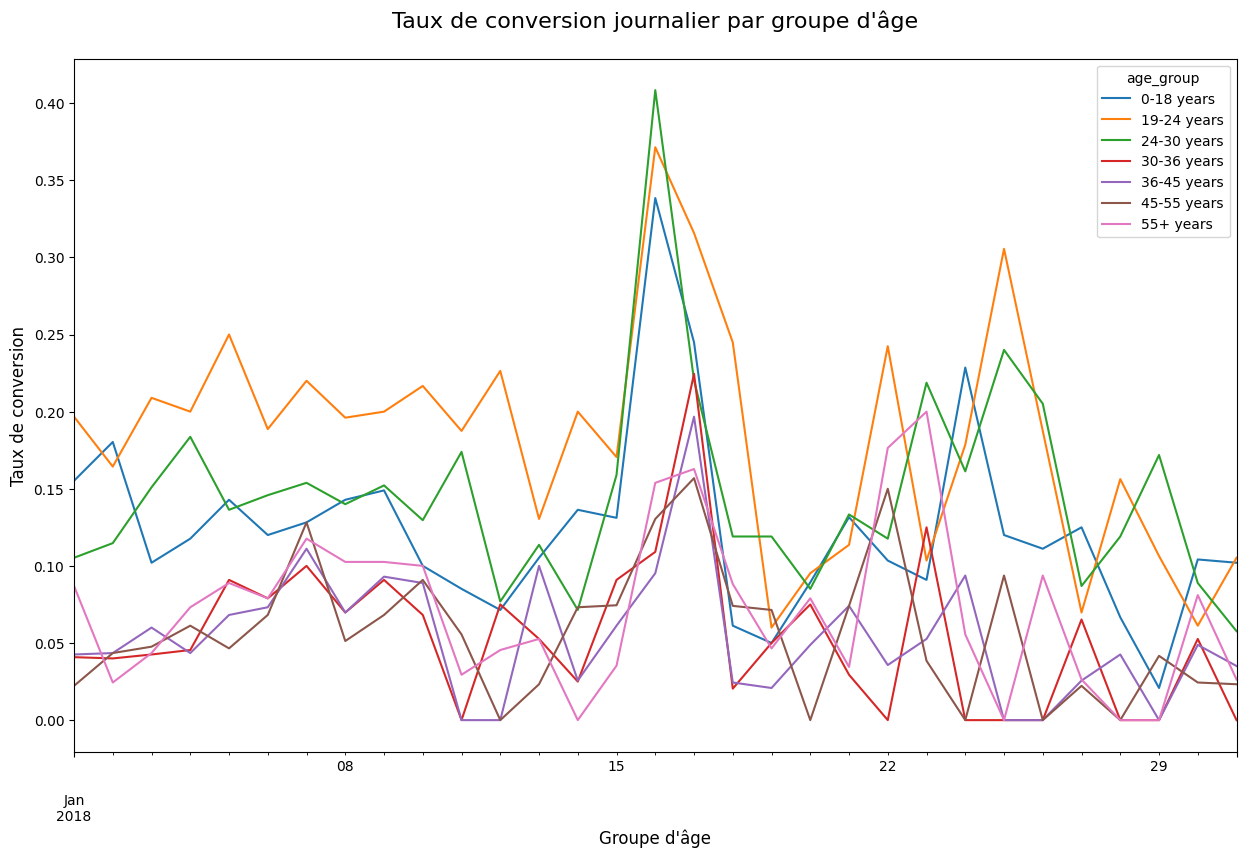

In [39]:
# Visualisation
daily_conv_rate_age_group.plot(kind='line', figsize = (15, 9))
plt.title("Taux de conversion journalier par groupe d'âge\n", fontsize=16)
plt.ylabel('Taux de conversion', fontsize=12)
plt.xlabel("Groupe d'âge", fontsize=12)
plt.show()

* **TAUX DE CONVERSION JOURNALIER PAR CANAL MARKETING**


In [40]:
daily_conv_rate_canal = conversion_rate(marketing_df, ['date_served', 'marketing_channel'])
daily_conv_rate_canal = pd.DataFrame(daily_conv_rate_canal.unstack(level=1))
daily_conv_rate_canal.head()

marketing_channel,Email,Facebook,House Ads,Instagram,Push
date_served,,,,,
2018-01-01,1.0,0.117647,0.084656,0.106667,0.083333
2018-01-02,1.0,0.098361,0.077982,0.129032,0.055556
2018-01-03,0.0,0.080645,0.088542,0.171875,0.083333
2018-01-04,0.5,0.138462,0.089820,0.126984,0.058824
2018-01-05,1.0,0.112903,0.126582,0.159420,0.027778


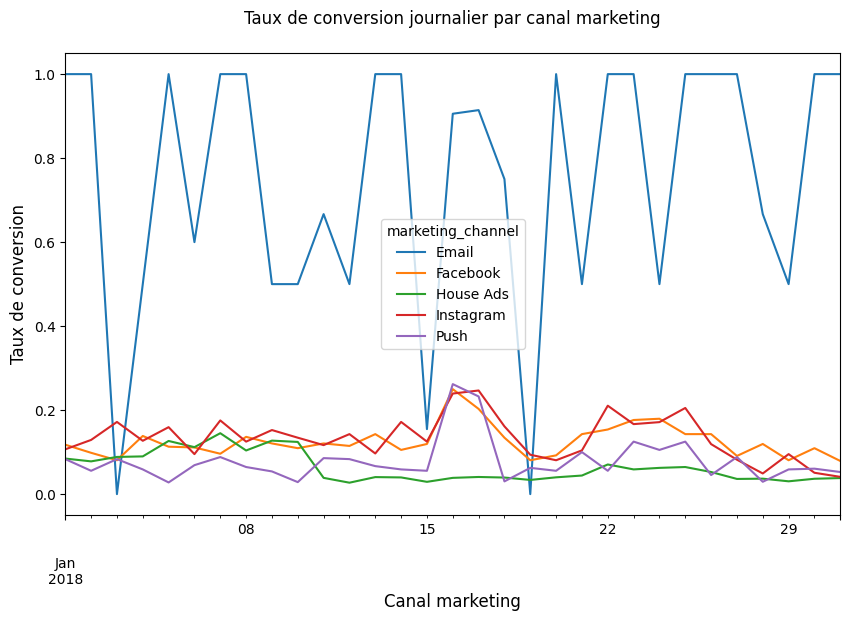

In [41]:
# Visualisation
daily_conv_rate_canal.plot(kind='line', figsize = (10, 6))
plt.title("Taux de conversion journalier par canal marketing\n", fontsize=12)
plt.ylabel('Taux de conversion',fontsize=12)
plt.xlabel("Canal marketing",fontsize=12)
plt.show()

* **TAUX DE CONVERSION PAR JOUR DE SEMAINE ET PAR CANAL MARKETING**  
Les utilisateurs sont -ils plus susceptibles de convertir le week-end par rapport aux autres jours
de la semaine ?


In [42]:
# Colonne Jour de la semaine où l'annonce a été diffusée
marketing_df['DoW_served'] = marketing_df['date_served'].dt.dayofweek
# Taux de conversion par jour de la semaine et par canal marketing
DoW_conversion = conversion_rate(marketing_df, ['DoW_served','marketing_channel'])
DoW_df = pd.DataFrame(DoW_conversion.unstack(level=1))
DoW_df

marketing_channel,Email,Facebook,House Ads,Instagram,Push
DoW_served,,,,,
0.0,0.162621,0.119601,0.062660,0.122517,0.064516
1.0,0.906250,0.147887,0.070312,0.151943,0.115854
2.0,0.837209,0.127036,0.075269,0.150160,0.105882
3.0,0.727273,0.133333,0.059034,0.143498,0.067797
4.0,0.666667,0.110132,0.062278,0.129870,0.055556
5.0,0.818182,0.109375,0.057566,0.088710,0.069767
6.0,0.750000,0.116071,0.065217,0.127193,0.065574


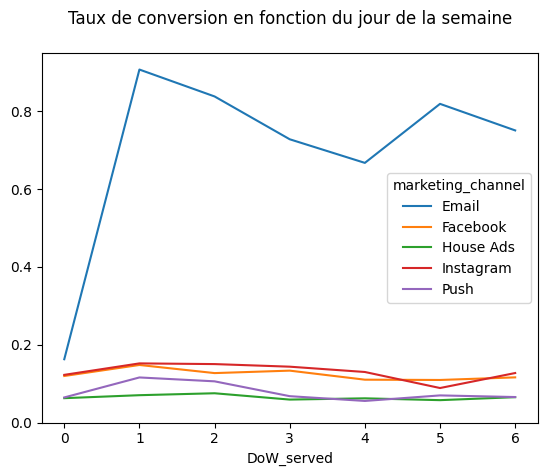

In [43]:
# Taux de conversion en fonction du jour de la semaine
DoW_df.plot()
plt.title('Taux de conversion en fonction du jour de la semaine\n')
plt.ylim(0)
plt.show()

Nous avons calculé les taux de conversion et de rétention pour divers segments ou combinaison
de segments. Il y a d’autres types d’analyses que vous pouvez effectuer.

* **PREFERENCES JOURNALIERES LINGUISTIQUES DES UTILISATEURS**

In [44]:
# Nombres d'utilisateurs pour chaque langue préférée à chaque date
n_lang_per_date = marketing_df.groupby(['date_served', 'language_preferred'])['user_id'].nunique()
print(n_lang_per_date)

date_served  language_preferred
2018-01-01   Arabic                  4
             English               342
             German                  5
             Spanish                11
2018-01-02   Arabic                  4
                                  ... 
2018-01-30   Spanish                19
2018-01-31   Arabic                  8
             English               310
             German                  5
             Spanish                17
Name: user_id, Length: 121, dtype: int64


In [45]:
# Transformation du résultat ci-dessus en une dataframe
n_lang_per_date = pd.DataFrame(n_lang_per_date.unstack(level=1))
#level=1 car c'est le deuxième index ('language_preferred') qu'on veut désempiler
n_lang_per_date.head()

language_preferred,Arabic,English,German,Spanish
date_served,,,,
2018-01-01,4.0,342.0,5.0,11.0
2018-01-02,4.0,355.0,5.0,10.0
2018-01-03,3.0,334.0,3.0,8.0
2018-01-04,2.0,305.0,2.0,14.0
2018-01-05,1.0,303.0,2.0,14.0


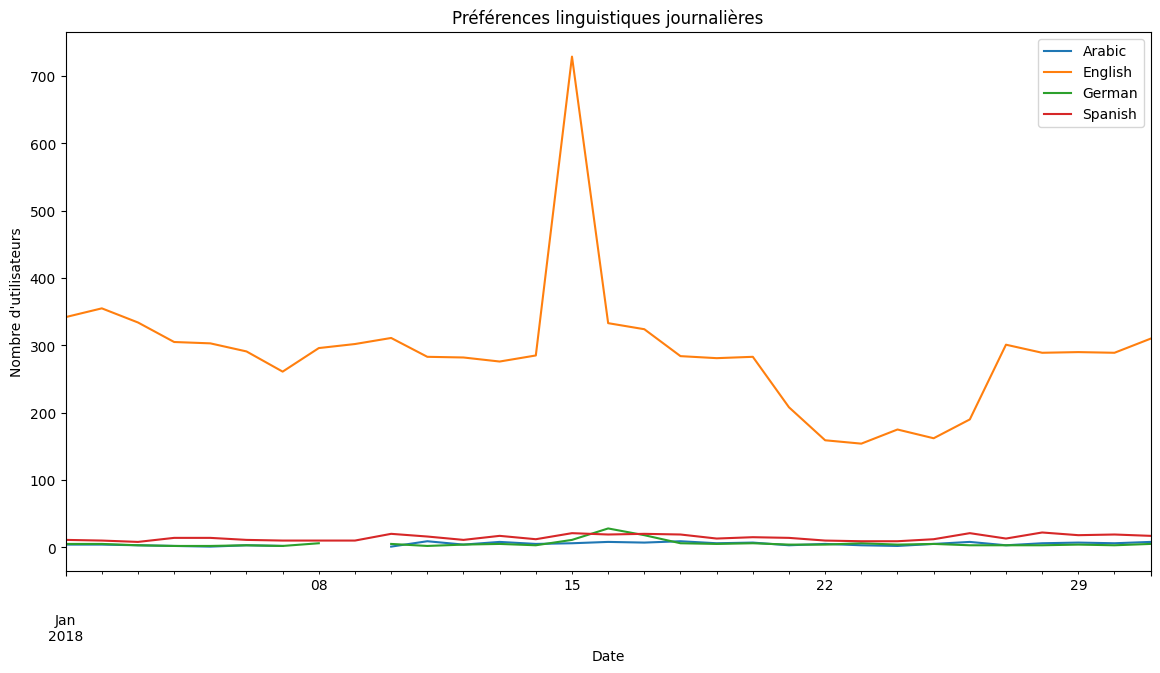

In [46]:
# Visualisation du résultat
n_lang_per_date.plot(figsize=(14, 7))
plt.title('Préférences linguistiques journalières')
plt.xlabel('Date')
plt.ylabel("Nombre d'utilisateurs")
plt.legend(loc = 'upper right', labels = n_lang_per_date.columns.values)
plt.show()

Comme nous l'avions vu précédemment, la langue la plus populaire est de loin l'Anglais.

**PREFERENCES LINGUISTIQUES PAR GROUPE D'AGE**

In [47]:
# Nombre d'utilisateurs par groupe d'âges et langues préférées
n_lang_per_age = marketing_df.groupby(['age_group', 'language_preferred'])['user_id'].nunique()
n_lang_per_age = pd.DataFrame(n_lang_per_age.unstack(level=1))
n_lang_per_age.head()

language_preferred,Arabic,English,German,Spanish
age_group,,,,
0-18 years,16,1126,24,43
19-24 years,18,1218,23,51
24-30 years,16,1121,29,54
30-36 years,12,978,12,57
36-45 years,13,993,14,39


L’Anglais demeure la langue préférée quel que soit le groupe d'âges.

**CANAUX MARKETING SELON LES GROUPES D'AGES**  

Supposons que les décideurs de l'entreprise veulent savoir si les canaux marketing atteignent
tous les utilisateurs de manière égale ou s'il y a une différence. Nous allons donc créer un
graphique indiquant le nombre de personnes atteintes par chaque canal marketing par âge.

In [48]:
# Nombre d'utilisateurs par groupe d'âges et canal d'acquisition
canal_age = marketing_df.groupby(['age_group', 'marketing_channel'])['user_id'].nunique()
canal_age = pd.DataFrame(canal_age.unstack(level=1))
canal_age.head()

marketing_channel,Email,Facebook,House Ads,Instagram,Push
age_group,,,,,
0-18 years,91,256,585,292,184
19-24 years,107,331,643,301,144
24-30 years,116,289,587,268,180
30-36 years,60,238,600,252,83
36-45 years,63,217,505,268,192


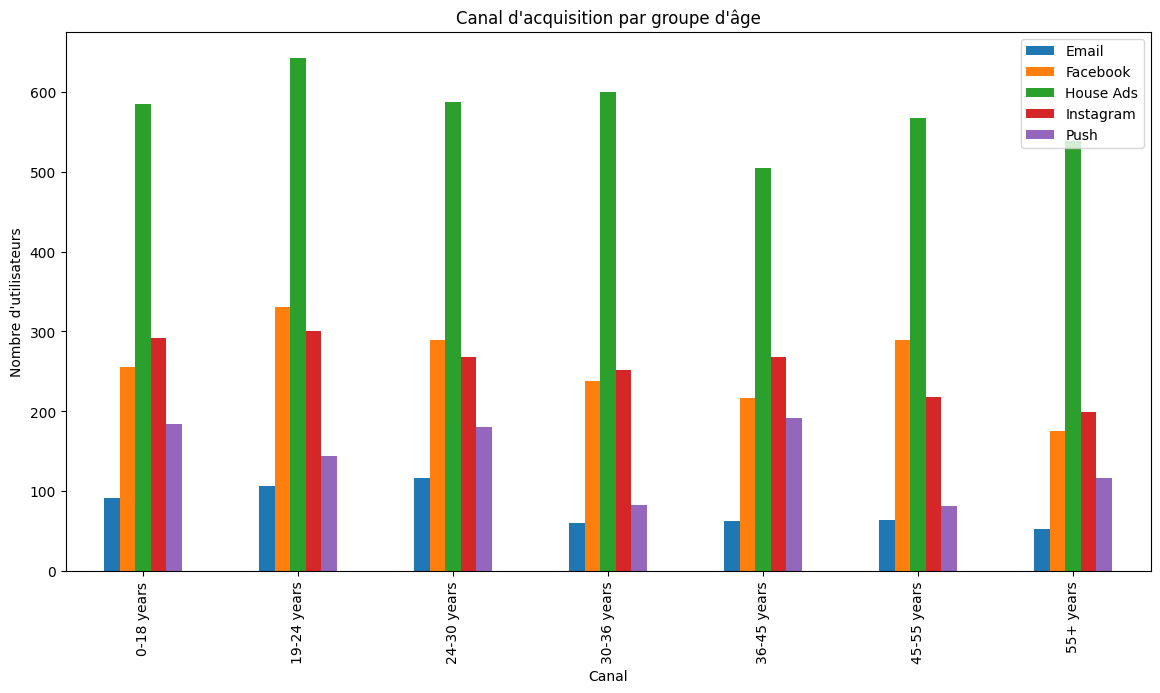

In [49]:
# Visualisation
canal_age.plot(kind='bar', figsize = (14, 7))
plt.title("Canal d'acquisition par groupe d'âge")
plt.xlabel("Canal")
plt.ylabel("Nombre d'utilisateurs")
plt.legend(loc = 'upper right', labels = canal_age.columns.values)
plt.show()

## CONCLUSION
Le Marketing est l'un des départements stratégiques les plus importants pour une entreprise.  
Pourvoir analyser les données clients afin d'en tirer des informations utiles est une compétence
hautement importante. Pandas est une librairie très puissante pour faire l'analyse des données
avec Python.  
A travers ce projet, nous avons utilisé quelques fonctionnalités de Pandas afin d'effectuer une
analyse descriptive de la campagne marketing d'une entreprise de services en ligne.